# DWCrawler | Exploratory analysis


<br>
<br>

**The challenge** | We recently crawled all DW articles published in German and English on the mobile webpage of DW. The corpura contain about 450 articles each (*DWCrawl_german.jsonl* & *DWCrawl_english.jsonl*).

It is your task to perform the first analysis to explore the data and generate insights. In the best case your results form the basis for future analyses to monitor the output of DW and help the editorial offices to improve their offer on DW.com. 

We know that's not a lot of time, but **the challenge is intended to take not more than 3 hours!** Here are the steps you should follow and document:

1. Read in the two JSON line files.
2. Preprocess the data into a more convenient format and perform some basic cleaning, if necessary.<br>
3. Explore the data set and find answers to these questions: <br> 
- How many articles were published in which category over time? <br>
- What is the mean, median and maximum length of the articles? How does that correlate with category?
 <br>
- Find the top 10 mentioned persons/countries/company/etc. in the corpus. <br>
- ... and whatever you find interesting! <br>
4. If you finished step 3. we are more than happy. The three hours are not over yet? Then we don't mind to see some topic modelling, sentiment analysis or similar! <br>

Please use markdowns and plots to document your approach and findings. **This jupyter notebook is not only your working zone, but also the document with which you can present your results to us!**

## Preliminaries

In [1]:
# Import necessary libraries

import jsonlines
import datetime
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from country_list import countries_for_language

In [2]:
# Define file names

input_german = "DWCrawl_german.jsonl/DWCrawl_german.jsonl"
input_english = "DWCrawl_english.jsonl/DWCrawl_english.jsonl"

## 1 | Read data

**Store articles in list and read them through jsonlines library's method open, specialised for jsonl files**

In [3]:
data_german=[]
data_english=[]

In [4]:
with jsonlines.open(input_german) as data:
    for obj in data:
        data_german.append(obj)

In [5]:
with jsonlines.open(input_english) as data:
    for obj in data:
        data_english.append(obj)

## 2 | Clean data

**Only these are removed:** \xa0, \n and multiple empty spaces 

**However for better text processing, in a later work if required,
there may be room for removing also the following word/phrases, as well as duration in minutes:**
 \nAdvertisement\n,  \nSend us your feedback.\n, \nSchicken Sie uns Ihr Feedback!\n, \nAnzeige\n,   Jetzt live  , Live

In [6]:
for article in data_german:
    article['content']=article['content'].replace('\xa0', ' ')
    article['content']=article['content'].replace('\n', ' ')
    article['content']=article['content'].replace('   ', ' ')
    article['content']=article['content'].replace('    ', ' ')
    article['content']=article['content'].replace('     ', ' ')
    article['content']=article['content'].replace('      ', ' ')
    article['content']=article['content'].replace('       ', ' ')
    article['content']=article['content'].replace('        ', ' ')
    article['content']=article['content'].replace('         ', ' ')
    article['content']=article['content'].replace('          ', ' ')
    article['content']=article['content'].replace('           ', ' ')
    article['content']=article['content'].replace('            ', ' ')
    article['content']=article['content'].replace('             ', ' ')
    article['content']=article['content'].replace('              ', ' ')
    article['content']=article['content'].replace('               ', ' ')
    article['content']=article['content'].replace('                ', ' ')

In [7]:
for article in data_english:
    article['artikeltext']=article['artikeltext'].replace('\xa0', ' ')
    article['artikeltext']=article['artikeltext'].replace('\n', ' ')
    article['artikeltext']=article['artikeltext'].replace('   ', ' ')
    article['artikeltext']=article['artikeltext'].replace('    ', ' ')
    article['artikeltext']=article['artikeltext'].replace('     ', ' ')
    article['artikeltext']=article['artikeltext'].replace('      ', ' ')
    article['artikeltext']=article['artikeltext'].replace('       ', ' ')
    article['artikeltext']=article['artikeltext'].replace('        ', ' ')
    article['artikeltext']=article['artikeltext'].replace('         ', ' ')
    article['artikeltext']=article['artikeltext'].replace('          ', ' ')
    article['artikeltext']=article['artikeltext'].replace('           ', ' ')
    article['artikeltext']=article['artikeltext'].replace('            ', ' ')
    article['artikeltext']=article['artikeltext'].replace('             ', ' ')
    article['artikeltext']=article['artikeltext'].replace('              ', ' ')
    article['artikeltext']=article['artikeltext'].replace('               ', ' ')
    article['artikeltext']=article['artikeltext'].replace('                ', ' ')

##  3 | Exploratory analysis 

### How many articles were published in which category over time?

**Due to the high number of categories and inability to accurately display them all, only a five parallel categories through time are given**

In [8]:
categories_english=[]
time=[]

for article in data_english:
    if article['created_at']!='': #only articles with inserted date of creation are taken into account
        time.append(article['created_at'])
        categories_english.append(article['category'])

In [9]:
occurences=dict((category,object) for category in np.unique(categories_english)) #dictionary with each category as key


for each_category in np.unique(categories_english):
    time_unique=np.array(np.unique(time)) #for each time given, how much articles of the given category are published
    counter=np.zeros(time_unique.shape) #initialize counter
    time_counter=np.vstack((time_unique, counter)).T #concatenating time and counter for each category
    for i in range(0,len(categories_english)): #pass through all articles from all categories
        if categories_english[i]==each_category: # check for category
            actual_time=time[i] 
            actual_index = np.where(time_counter[:,0]==actual_time)
            
            #for each occurence of category, raise the counter at the given date
            time_counter[actual_index,1]=int(float(time_counter[actual_index,1]))+1 
    occurences[each_category]=time_counter

**Available categories:**

In [10]:
np.unique(categories_english)

array(['ABOUT DW', 'Africa', 'Americas', 'Arts', 'Asia', 'BTHVN2020',
       'Baking Bread', 'Berlin Wall', 'Books', 'Business', 'Coronavirus',
       'Culture', 'DW AKADEMIE', 'DW Freedom', 'Digital Culture',
       'Eco Africa', 'Environment', 'Europe', 'Film', 'Founders Valley',
       'Germany', 'Global Ideas', 'LEARN GERMAN', 'Lifestyle',
       'Middle East', 'Music', 'My 2030', 'Planet Berlin', 'SPECIAL',
       'Science', 'Sports', 'Top Stories', 'Travel', 'Wo+men', 'World'],
      dtype='<U15')

**FOR DWCrawl_English: Choose category from the above given and insert it into the key value in the cell below**

In [11]:
chosen_category1='Europe' #<---------------insert here
chosen_category2='Top Stories' #<---------------insert here
chosen_category3='Germany' #<---------------insert here
chosen_category4='Business' #<---------------insert here
chosen_category5='LEARN GERMAN' #<---------------insert here

In [12]:
chosen_array1=occurences[chosen_category1]
chosen_array2=occurences[chosen_category2]
chosen_array3=occurences[chosen_category3]
chosen_array4=occurences[chosen_category4]
chosen_array5=occurences[chosen_category5]

**Visualisation: Published articles in English per categories  through time**

<Figure size 500x500 with 0 Axes>

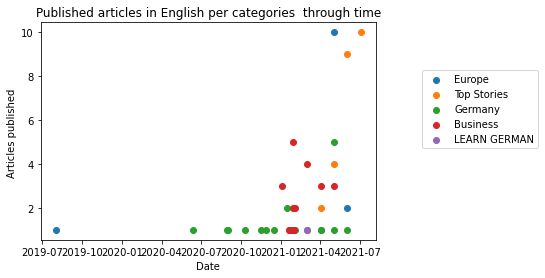

<Figure size 500x500 with 0 Axes>

In [13]:
def to_int_from_str(x): 
    return int(float(x))

to_int_from_str_vectorized = np.vectorize(to_int_from_str) #vectorize function for converting to int

plt.ylabel('Articles published ')
plt.xlabel('Date')
plt.title('Published articles in English per categories  through time') 

#5 plots

plt.scatter(dates.num2date(dates.datestr2num(chosen_array1[to_int_from_str_vectorized(chosen_array1[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array1[to_int_from_str_vectorized(chosen_array1[:,1])>0][:,1]),label=chosen_category1)
if chosen_category2!='': #if clause in case there are not all 5 categories  chosen
    plt.scatter(dates.num2date(dates.datestr2num(chosen_array2[to_int_from_str_vectorized(chosen_array2[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array2[to_int_from_str_vectorized(chosen_array2[:,1])>0][:,1]),label=chosen_category2)
if chosen_category3!='':
    plt.scatter(dates.num2date(dates.datestr2num(chosen_array3[to_int_from_str_vectorized(chosen_array3[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array3[to_int_from_str_vectorized(chosen_array3[:,1])>0][:,1]),label=chosen_category3)
if chosen_category4!='':
    plt.scatter(dates.num2date(dates.datestr2num(chosen_array4[to_int_from_str_vectorized(chosen_array4[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array4[to_int_from_str_vectorized(chosen_array4[:,1])>0][:,1]),label=chosen_category4)
if chosen_category5!='':
    plt.scatter(dates.num2date(dates.datestr2num(chosen_array5[to_int_from_str_vectorized(chosen_array5[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array5[to_int_from_str_vectorized(chosen_array5[:,1])>0][:,1]),label=chosen_category5)
plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.6))

plt.figure(num=None, figsize=(1, 1), dpi=500, facecolor='w', edgecolor='k')

In [14]:
categories_german=[]
time=[]

for article in data_german:
    if article['created_at']!='': #only articles with inserted date of creation are taken into account
        time.append(article['created_at'])
        categories_german.append(article['category'])

In [15]:
occurences=dict((category,object) for category in np.unique(categories_german)) #dictionary with each category as key


for each_category in np.unique(categories_german):
    time_unique=np.array(np.unique(time)) #for each time given, how much articles of the given category are published
    counter=np.zeros(time_unique.shape) #initialize counter
    time_counter=np.vstack((time_unique, counter)).T #concatenating time and counter for each category
    for i in range(0,len(categories_german)): #pass through all articles from all categories
        if categories_german[i]==each_category: # check for category
            actual_time=time[i] 
            actual_index = np.where(time_counter[:,0]==actual_time)
            
            #for each occurence of category, raise the counter at the given date
            time_counter[actual_index,1]=int(float(time_counter[actual_index,1]))+1 
    occurences[each_category]=time_counter

**Available categories:**

In [16]:
np.unique(categories_german)

array(['100 Gute Bücher', '50 Küchen, eine Heimat', 'Afrika', 'Amerika',
       'Asien', 'BTHVN2020', 'Baking Bread', 'Bücher', 'Coronavirus',
       'DEUTSCH LERNEN', 'DW AKADEMIE', 'Deutschland',
       'Deutschland evangelisch-katholisch', 'Deutschland verstehen',
       'Digitales Leben', 'Erste Schritte in Deutschland', 'Europa',
       'Filme', 'Global Ideas', 'Kultur', 'Kunst', 'Lebensart', 'Musik',
       'Nahost', 'Planet Berlin', 'Qantara.de', 'Reise', 'Sport',
       'Themen', 'UNTERNEHMEN', 'Welt', 'Wirtschaft', 'Wissen & Umwelt'],
      dtype='<U34')

**FOR DWCrawl_German: Choose category from the above given and insert it into the key value in the cell below**

In [17]:
chosen_category1='Europa' #<---------------insert here
chosen_category2='Themen' #<---------------insert here
chosen_category3='Deutschland' #<---------------insert here
chosen_category4='Wirtschaft' #<---------------insert here
chosen_category5='DEUTSCH LERNEN' #<---------------insert here

In [18]:
chosen_array1=occurences[chosen_category1]
chosen_array2=occurences[chosen_category2]
chosen_array3=occurences[chosen_category3]
chosen_array4=occurences[chosen_category4]
chosen_array5=occurences[chosen_category5]

**Visualisation: Published articles in German per categories  through time**

<Figure size 500x500 with 0 Axes>

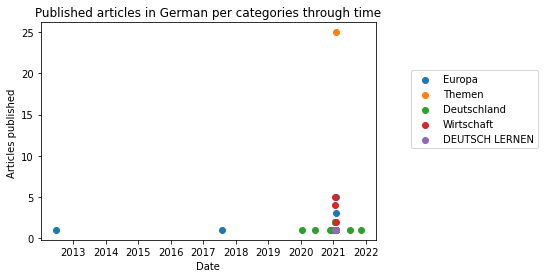

<Figure size 500x500 with 0 Axes>

In [19]:
def to_int_from_str(x): 
    return int(float(x))

to_int_from_str_vectorized = np.vectorize(to_int_from_str) #vectorize function for converting to int

plt.ylabel('Articles published ')
plt.xlabel('Date')
plt.title('Published articles in German per categories through time') 

#5 plots

plt.scatter(dates.num2date(dates.datestr2num(chosen_array1[to_int_from_str_vectorized(chosen_array1[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array1[to_int_from_str_vectorized(chosen_array1[:,1])>0][:,1]),label=chosen_category1)
if chosen_category2!='': #if clause in case there are not all 5 categories  chosen
    plt.scatter(dates.num2date(dates.datestr2num(chosen_array2[to_int_from_str_vectorized(chosen_array2[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array2[to_int_from_str_vectorized(chosen_array2[:,1])>0][:,1]),label=chosen_category2)
if chosen_category3!='':
    plt.scatter(dates.num2date(dates.datestr2num(chosen_array3[to_int_from_str_vectorized(chosen_array3[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array3[to_int_from_str_vectorized(chosen_array3[:,1])>0][:,1]),label=chosen_category3)
if chosen_category4!='':
    plt.scatter(dates.num2date(dates.datestr2num(chosen_array4[to_int_from_str_vectorized(chosen_array4[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array4[to_int_from_str_vectorized(chosen_array4[:,1])>0][:,1]),label=chosen_category4)
if chosen_category5!='':
    plt.scatter(dates.num2date(dates.datestr2num(chosen_array5[to_int_from_str_vectorized(chosen_array5[:,1])>0][:,0])),to_int_from_str_vectorized(chosen_array5[to_int_from_str_vectorized(chosen_array5[:,1])>0][:,1]),label=chosen_category5)
plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.6))

plt.figure(num=None, figsize=(1, 1), dpi=500, facecolor='w', edgecolor='k')

### What is the mean, median and maximum length of the articles? How does that correlate with category?

**Calculations of the appropriate categories by both category and by language**

In [20]:
#dictionary with each category as key and array of artice lengths
overall_length_and_occurences_by_category_english=dict((category,[]) for category in np.unique(categories_english)) 
overal_length_english=[]

for each_category in np.unique(categories_english): #pass each category
    for article in data_english: #pass each article
        overal_length_english.append(len(article['artikeltext']))
        if article['category']== each_category: #check fit
            overall_length_and_occurences_by_category_english[each_category].append(len(article['artikeltext']))

In [21]:
#dictionary with each category as key and array of artice lengths
overall_length_and_occurences_by_category_german=dict((category,[]) for category in np.unique(categories_german)) 
overal_length_german=[]

for each_category in np.unique(categories_german): #pass each category
    for article in data_german: #pass each article
        overal_length_german.append(len(article['content']))
        if article['category']== each_category: #check fit
            #array with content lenghts for each category
            overall_length_and_occurences_by_category_german[each_category].append(len(article['content']))

In [22]:
np.unique(categories_english)

array(['ABOUT DW', 'Africa', 'Americas', 'Arts', 'Asia', 'BTHVN2020',
       'Baking Bread', 'Berlin Wall', 'Books', 'Business', 'Coronavirus',
       'Culture', 'DW AKADEMIE', 'DW Freedom', 'Digital Culture',
       'Eco Africa', 'Environment', 'Europe', 'Film', 'Founders Valley',
       'Germany', 'Global Ideas', 'LEARN GERMAN', 'Lifestyle',
       'Middle East', 'Music', 'My 2030', 'Planet Berlin', 'SPECIAL',
       'Science', 'Sports', 'Top Stories', 'Travel', 'Wo+men', 'World'],
      dtype='<U15')

In [23]:
#calculate mean, median and max. length by category and also, for all articles in english

mean_by_category_english=dict((category,0.0) for category in np.unique(categories_english)) 
median_by_category_english=dict((category,0.0) for category in np.unique(categories_english))
maximum_length_by_category_english=dict((category,0.0) for category in np.unique(categories_english))
mean_overall_english=np.mean(overal_length_english)
median_overall_english=np.median(overal_length_english)
max_length_english=np.amax(overal_length_english)

for each_category in np.unique(categories_english): #pass each category
    mean_by_category_english[each_category]=np.mean(overall_length_and_occurences_by_category_english[each_category])
    median_by_category_english[each_category]=np.median(overall_length_and_occurences_by_category_english[each_category])
    maximum_length_by_category_english[each_category]=np.amax(overall_length_and_occurences_by_category_english[each_category])

In [24]:
#calculate mean, median and max. length by category and also, for all articles in german


mean_by_category_german=dict((category,0.0) for category in np.unique(categories_german)) 
median_by_category_german=dict((category,0.0) for category in np.unique(categories_german))
maximum_length_by_category_german=dict((category,0.0) for category in np.unique(categories_german))
mean_overall_german=np.mean(overal_length_german)
median_overall_german=np.median(overal_length_german)
max_length_german=np.amax(overal_length_german)

for each_category in np.unique(categories_german): #pass each category
    mean_by_category_german[each_category]=np.mean(overall_length_and_occurences_by_category_german[each_category])
    median_by_category_german[each_category]=np.median(overall_length_and_occurences_by_category_german[each_category])
    maximum_length_by_category_german[each_category]=np.amax(overall_length_and_occurences_by_category_german[each_category])

**Visualisation: Mean, median and maximul length for articles**

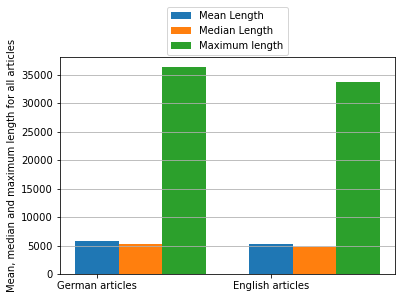

In [25]:
labels=['Mean Length','Median Length','Maximum length']
language=['German articles', 'English articles']
pos = np.arange(1.25)
bar_width = 0.25
mean_overall=[mean_overall_german,mean_overall_english]
median_overall=[median_overall_german,median_overall_english]
max_length_overall=[max_length_german,max_length_english]

 
plt.bar(pos,mean_overall,bar_width)
plt.bar(pos+bar_width,median_overall,bar_width)
plt.bar(pos+2*bar_width,max_length_overall,bar_width)


plt.xticks(pos, language)
plt.ylabel('Mean, median and maximum length for all articles')
plt.legend(labels,loc="upper center", bbox_to_anchor=(0.5, 1.25))
plt.grid(True, linestyle='-',axis='y')

plt.savefig('Overall_mean_median_and_maximum_length.pdf',bbox_inches='tight')

**Visualisation: Mean by category for English articles**

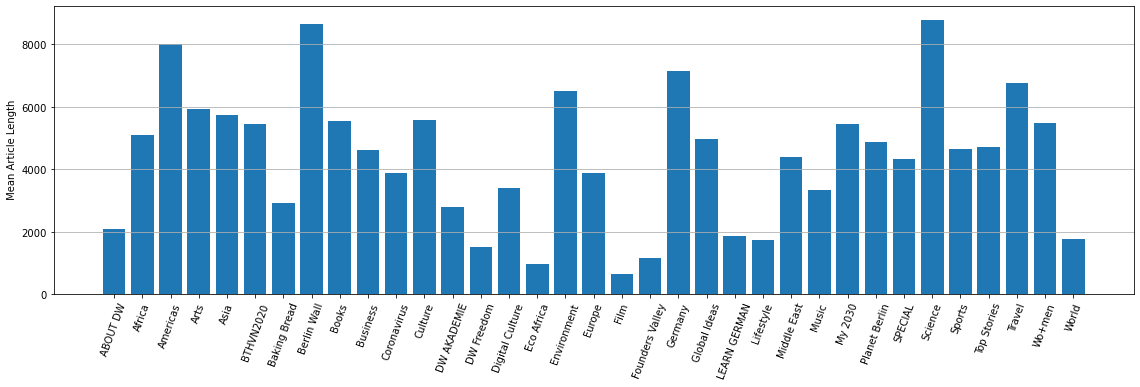

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
categories = list(mean_by_category_english.keys())
lengths =list(mean_by_category_english.values())
ax.bar(categories,lengths )
plt.ylabel(' Mean Article Length')
plt.xticks(rotation=70)
plt.grid(True, linestyle='-',axis='y')

**Visualisation: Median by category for English articles**

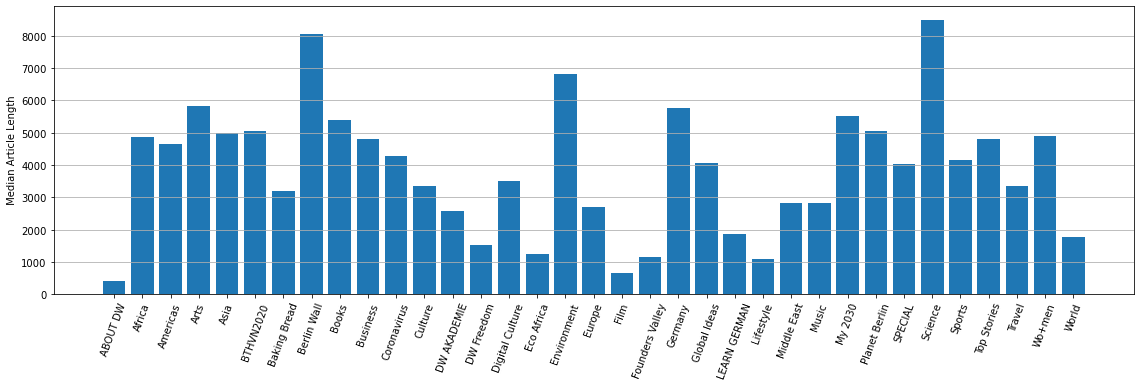

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
categories = list(median_by_category_english.keys())
lengths =list(median_by_category_english.values())
ax.bar(categories,lengths )
plt.ylabel(' Median Article Length')
plt.xticks(rotation=70)
plt.grid(True, linestyle='-',axis='y')

**Visualisation: Maximum Length by category for English articles**

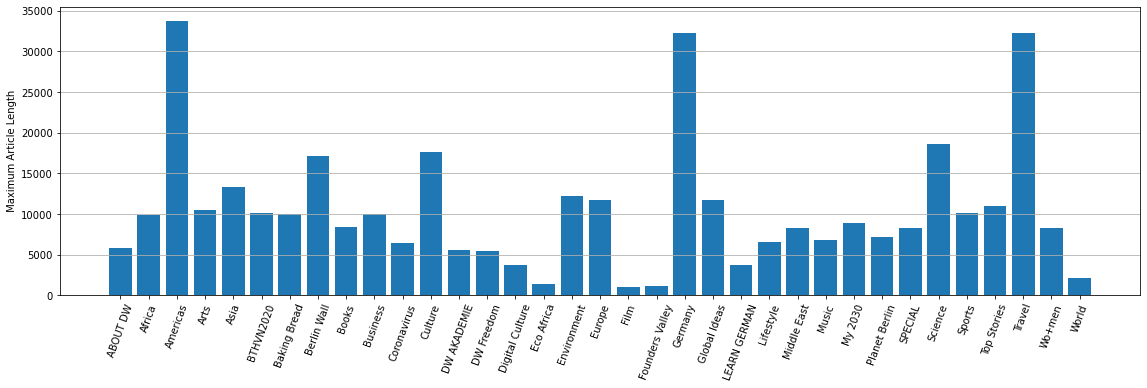

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
categories = list(maximum_length_by_category_english.keys())
lengths =list(maximum_length_by_category_english.values())
ax.bar(categories,lengths )
plt.ylabel(' Maximum Article Length')
plt.xticks(rotation=70)
plt.grid(True, linestyle='-',axis='y')

**Visualisation: Mean by category for German articles**

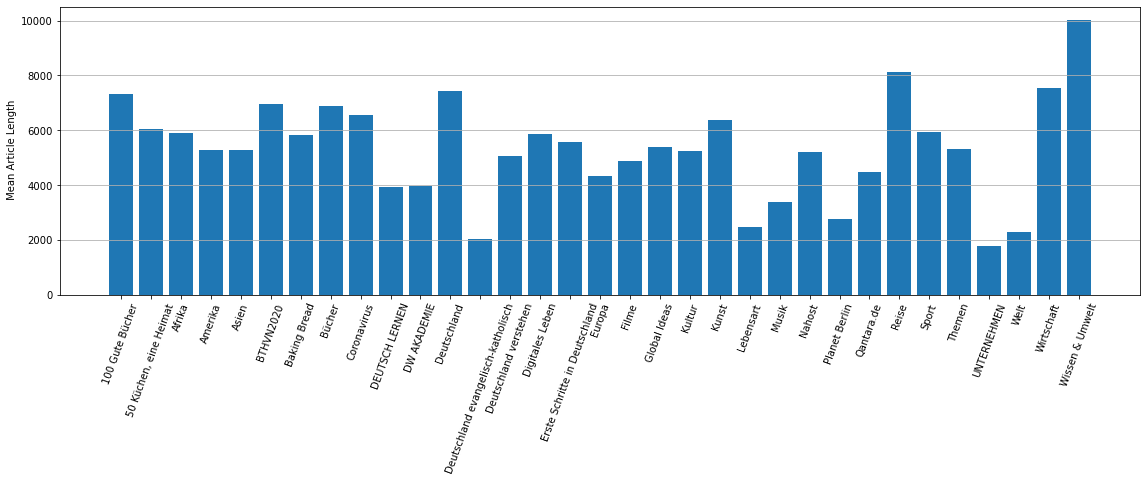

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
categories = list(mean_by_category_german.keys())
lengths =list(mean_by_category_german.values())
ax.bar(categories,lengths )
plt.ylabel(' Mean Article Length')
plt.xticks(rotation=70)
plt.grid(True, linestyle='-',axis='y')

**Visualisation: Median by category for German articles**

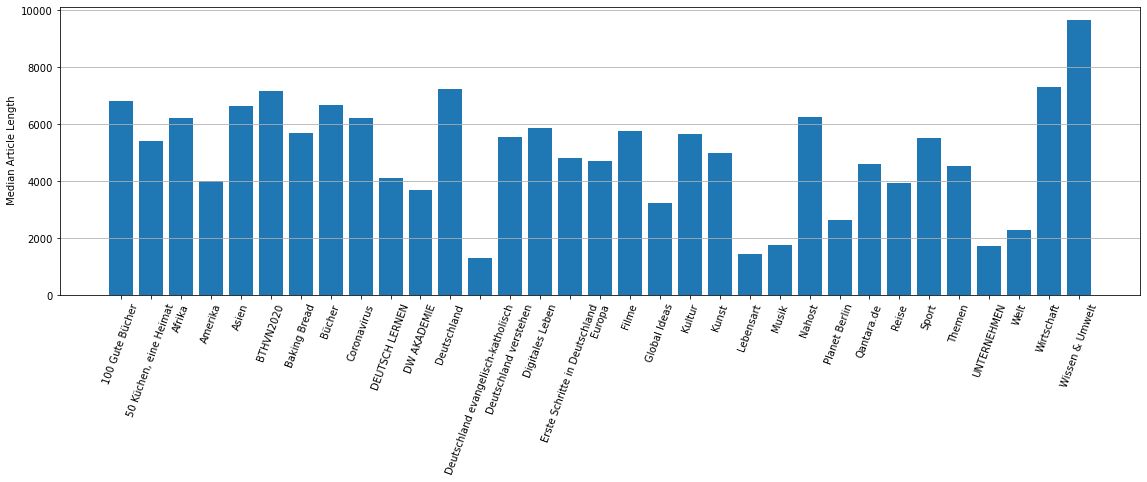

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
categories = list(median_by_category_german.keys())
lengths =list(median_by_category_german.values())
ax.bar(categories,lengths )
plt.ylabel(' Median Article Length')
plt.xticks(rotation=70)
plt.grid(True, linestyle='-',axis='y')

**Visualisation: Maximum Length by category for German articles**

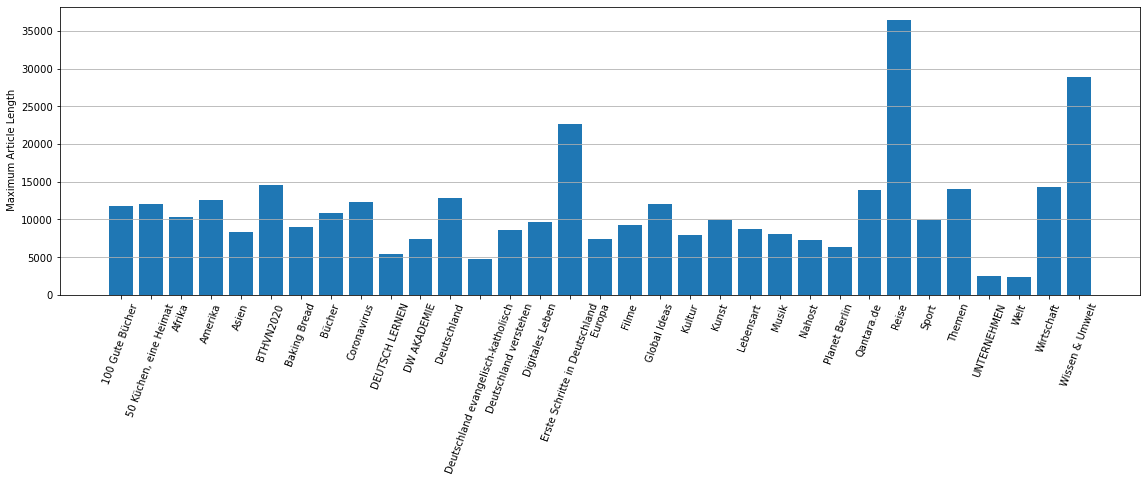

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
categories = list(maximum_length_by_category_german.keys())
lengths =list(maximum_length_by_category_german.values())
ax.bar(categories,lengths )
plt.ylabel(' Maximum Article Length')
plt.xticks(rotation=70)
plt.grid(True, linestyle='-',axis='y')

### Find the top 10 mentioned persons/countries/company/etc. in the corpus.

In [32]:
#get both English and German names of coutnries

countries_English = dict(countries_for_language('en'))
countries_German = dict(countries_for_language('de'))

country_codes=list(countries_English.keys())

contry_mentioning=dict((country,0) for country in country_codes) #initialize counter

In [33]:
for country in country_codes: #for each country code
    
    #for each article in german, check both german and english name of country
    #for each article in english, check both german and english name of country
    
    for article in data_german: 
        if countries_English[country] in article['content']:
            contry_mentioning[country]=contry_mentioning[country]+1
        
    for article in data_english:
        if countries_English[country] in article['artikeltext']:
            contry_mentioning[country]=contry_mentioning[country]+1
        
    for article in data_english:
        if countries_German[country] in article['artikeltext']:
            contry_mentioning[country]=contry_mentioning[country]+1
        
    for article in data_german:
        if countries_German[country] in article['content']:
            contry_mentioning[country]=contry_mentioning[country]+1
            
country_mentioning_top10=dict(sorted(contry_mentioning.items(), key=(lambda item: item[1]),reverse=True)[0:10]) #get top 10

country_keys=country_mentioning_top10.keys() #get keys, which are going to be country codes
country_keys=list(country_keys) #list, so they can be iterable by for

for country_item in country_keys: #change from codes to names of countries in German
    country_code=country_item
    country_name=countries_German[country_code]
    country_mentioning_top10[country_name]=country_mentioning_top10.pop(country_code)

**These are the top 10 mentioned countries in English and German language  articles, along with the count of mentions**

In [34]:
country_mentioning_top10

{'Deutschland': 476,
 'China': 230,
 'Frankreich': 116,
 'Russland': 107,
 'Indien': 98,
 'Israel': 96,
 'Japan': 90,
 'Österreich': 81,
 'Italien': 81,
 'Vereinigte Staaten': 81}

**Visualisation of above list**

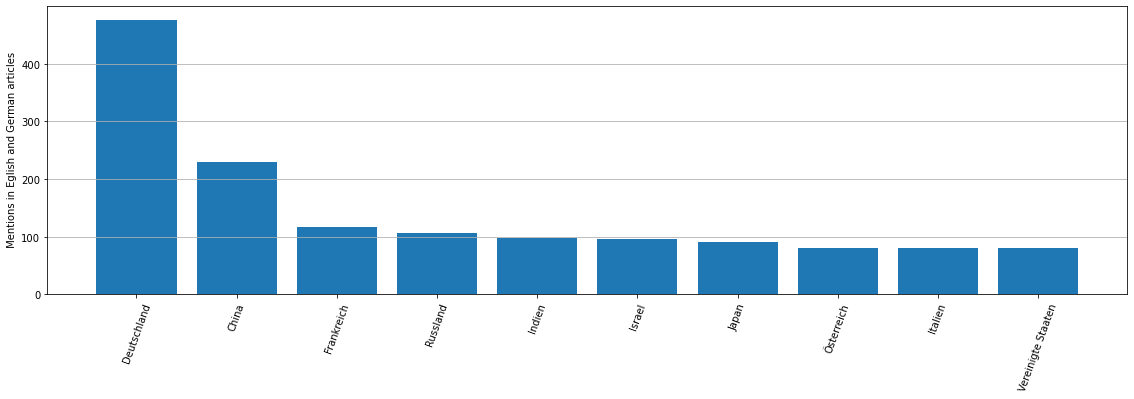

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
categories = list(country_mentioning_top10.keys())
lengths =list(country_mentioning_top10.values())
ax.bar(categories,lengths )
plt.ylabel(' Mentions in Eglish and German articles')
plt.xticks(rotation=70)
plt.grid(True, linestyle='-',axis='y')

**The same can be done if a list of persons or companies is given- Due to availability of those two lists and time issues, I did it only with countries**

## 4 | Anything else